# Qubits

### Import section

In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import *
#from qiskit.visualization import *
%matplotlib inline
import numpy as np
from math import pi

#import Qconfig

ModuleNotFoundError: No module named 'qiskit_aer'

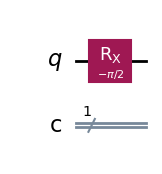

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


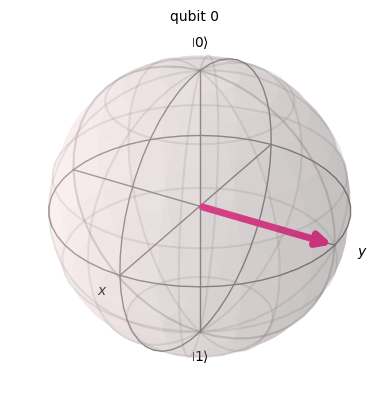

In [7]:
qc = QuantumCircuit(1,1)
#qc.rx(-pi/2,0)
#qc.ry(pi/2,1)
#qc.measure(0,0)
#qc.measure(1,1)

display(qc.draw('mpl'))

backend = StatevectorSimulator()
job = backend.run(qc).result()
print(job.get_statevector())

plot_bloch_multivector(job.get_statevector())

### Visualize state vectors

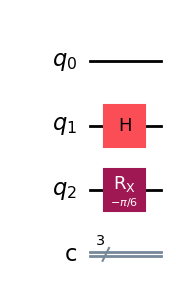

Statevector([0.6830127+0.j       , 0.       +0.j       ,
             0.6830127+0.j       , 0.       +0.j       ,
             0.       +0.1830127j, 0.       +0.j       ,
             0.       +0.1830127j, 0.       +0.j       ],
            dims=(2, 2, 2))


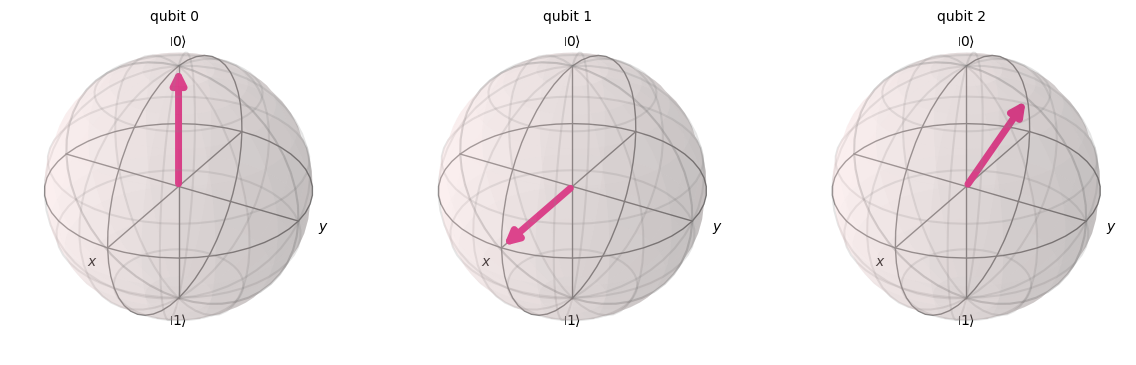

In [21]:
#plot_bloch_multivector([0,0,1], title="Bloch vector")

qc = QuantumCircuit(3,3)
#qc.x(0)
#qc.x(1)
qc.h(1)
qc.rx(-pi/6,2)
#qc.measure(0,0)
#qc.measure(1,1)
#qc.measure(2,2)

display(qc.draw('mpl'))

backend = StatevectorSimulator()
job = backend.run(qc).result()

print(job.get_statevector())

plot_bloch_multivector(job.get_statevector(qc))

#print(job.get_statevector(qc))

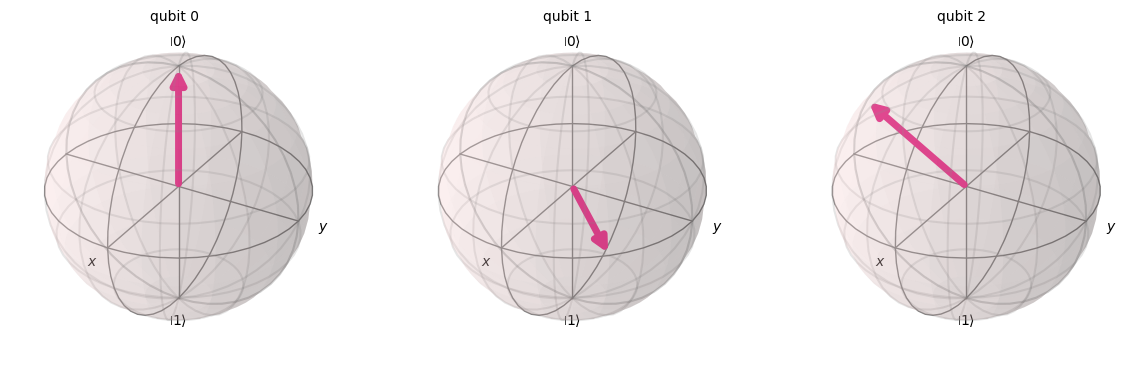

In [25]:
qc = QuantumCircuit(3,3)
qc.h(1)
qc.rz(pi/4,1)
qc.rx(pi/3,2)
#qc.measure(0,0)
backend = StatevectorSimulator()

job = backend.run(qc).result()
plot_bloch_multivector(job.get_statevector(qc))

## Arbitrary rotations from H and T

##### Differently from generic $R_{\alpha}(\theta)$ rotations H and T gates can be implemented fault-tolerantly

In [32]:
qc = QuantumCircuit(1)

qc.t(0)

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary(),2))

[[1.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.71+0.71j]]


#### $T=R_z(\pi/4)$

In [38]:
qc = QuantumCircuit(1)

#qc.u1(pi/4,0)
qc.rz(pi/4,0)

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary()/U.get_unitary()[0,0],2))

[[1.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.71+0.71j]]


C:\Users\aless\AppData\Local\Temp\ipykernel_9184\469100954.py:9: DeprecationWarning: The return type of saved unitaries has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Operator` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print(np.round(U.get_unitary()/U.get_unitary()[0,0],2))
C:\Users\aless\AppData\Local\Temp\ipykernel_9184\469100954.py:11: DeprecationWarning: The return type of saved unitaries has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Operator` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  U.get_unitary()[0,0]


(0.9238795325112867-0.3826834323650898j)

#### We can obtain a rotation about $x$ by combining T and H

In [39]:
qc = QuantumCircuit(1)

qc.h(0)
#qc.rz(pi/4,0)
qc.t(0)
qc.h(0)

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary()*np.exp(-1j*pi/8),2))


[[ 0.92-0.j   -0.  -0.38j]
 [ 0.  -0.38j  0.92-0.j  ]]


#### Indeed, $HTH = R_x(\pi/4)$

In [42]:
qc = QuantumCircuit(1)

qc.rx(pi/4,0)

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary(),2))


[[0.92+0.j   0.  -0.38j]
 [0.  -0.38j 0.92+0.j  ]]


#### We can then combine the two. 

In [43]:
qc = QuantumCircuit(1)

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary(),2))


[[0.85+0.35j 0.15-0.35j]
 [0.35-0.15j 0.35+0.85j]]


#### This is still a rotation about some axis on the Bloch sphere, but by an irrational angle

In [44]:
qc = QuantumCircuit(1)

Nrep = 33

for j in range(Nrep):
    qc.h(0)
    qc.t(0)

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary(),2))

[[-0.44-0.59j -0.68+0.j  ]
 [-0.48-0.48j  0.72-0.1j ]]


#### We can prove formally that an arbitrary rotation angle can be obtained (with $2\pi/n$ accuracy) by repeating this sequence a sufficient number $n$ of times

#### In addition, we can obtain an irrational rotation about a different axis by reverting the order of T and H

In [45]:
qc = QuantumCircuit(1)

Nrep = 24

for j in range(Nrep):
    qc.t(0)
    qc.h(0)
    qc.t(0)
    qc.h(0)

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary(),2))

[[ 0.83-0.38j  0.16-0.38j]
 [-0.16-0.38j  0.83+0.38j]]


### This demonstrates that H and T can be used to generate an arbitrary single-qubit rotation